# MNIST database of handwritten digits
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Firstly, let's select TensorFlow version 2.x in colab

In [0]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.1.0'

In [0]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Import dataset
- This dataset can be imported
- High level API Keras has some datasets available
- mnist.load_data() returns two tuples (x_train, y_train), (x_test, y_test):
  - x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28)
  - y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).


In [0]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

### Print shape and some values of label

In [0]:
print(y_train.shape)
print('First 5 examples are: ', y_train[0:5])

(60000,)
First 5 examples are:  [5 0 4 1 9]


Let's visualize some numbers using matplotlib

Label: 0


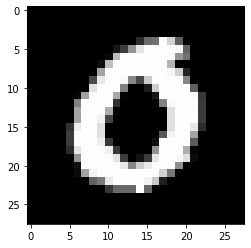

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

### Print shape of the data

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [0]:
from tensorflow.keras.utils import to_categorical

print("Value before encoding:", y_train[0])

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])

Value before encoding: 5
Shape of y_train: (60000, 10)
One hot encoded value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Define the model
- The Sequential model is a linear stack of layers.
- The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
- You can also simply add layers via the .add() method

In [0]:
# Initialize Sequential model
model = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tensorflow.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tensorflow.keras.layers.BatchNormalization())

### Apply ReLU and Dropout

In [0]:
# Hidden layers
model.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.3))

In [0]:
#Output layer
model.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

### Compile the model
- Here we configure the model for training
- We will specify an optimizer, loss function and a metrics
- You can read more about it here https://keras.io/models/sequential/

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Summarize the model
- model.summary() prints a summary representation of your model. For layers with multiple outputs, multiple is displayed instead of each individual output shape due to size limitations.

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1

### Fit the model
- .fit() trains the model for a fixed number of epochs (iterations on a dataset)
- An epoch is an iteration over the entire x and y data provided
- batch_size is the number of samples per gradient update
- validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch

In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5260 - accuracy: 0.8469 - val_loss: 0.2625 - val_accuracy: 0.9502
Epoch 2/30
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2495 - accuracy: 0.9365 - val_loss: 0.2020 - val_accuracy: 0.9604
Epoch 3/30
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1902 - accuracy: 0.9515 - val_loss: 0.1945 - val_accuracy: 0.9667
Epoch 4/30
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1553 - accuracy: 0.9605 - val_loss: 0.1913 - val_accuracy: 0.9667
Epoch 5/30
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1324 - accuracy: 0.9666 - val_loss: 0.4092 - val_accuracy: 0.9662
Epoch 6/30
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1188 - accuracy: 0.9692 - val_loss: 0.2137 - val_accuracy: 0.9700
Epoch 7/30
60000/60000 [=============================

# Evaluate the model

In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.3179 - accuracy: 0.9730


[0.3178853263970419, 0.973]